In [1]:
from pydap.client import open_url
import pylab as pl
import numpy as np
from ipywidgets import interact, fixed, IntSlider
%matplotlib inline

In [2]:
f = open_url('http://136.152.226.160:8080/opendap/claw/hdf5/17jul20strip.IMSC.h5')

In [3]:
data = f['PRIMARY_DATA']
shape = data.shape

In [4]:
# fixed parameters
dx = 800
dy = 400
minval = data[0,0].min()
maxval = data[0,0].max()
stdval = data[0,0].std()
vmin = minval + 3*stdval
vmax = 20*stdval
print('Image min, max {0:3.2f}, {1:3.2f} ({2:3.2f} sigma, {3:3.2f} sigma)'.format(minval, maxval, minval/stdval, maxval/stdval))
print('Displaying from {0:3.2f} to {1:3.2f}'.format(vmin, vmax))

Image min, max -0.05, 3.02 (-5.63 sigma, 332.70 sigma)
Displaying from -0.02 to 0.18


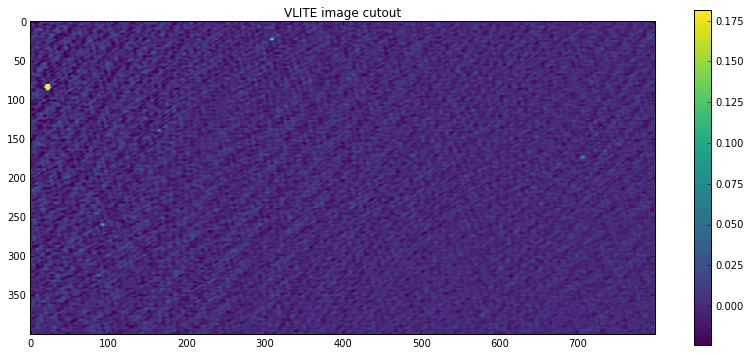

In [5]:
@interact
def displayimage(x=IntSlider(min=0, max=shape[3]-dx, value=0), 
                 y=IntSlider(min=0, max=shape[2]-dy, value=0), 
                 dx=fixed(dx), dy=fixed(dy)):
    im = data[0, 0, y:y+dy, x:x+dx]
    pl.figure(1, figsize=(14,6))
    pl.title('VLITE image cutout')
    pl.imshow(im[0,0], aspect='equal', interpolation='nearest', vmin=vmin, vmax=vmax, cmap='viridis')
    pl.colorbar()